In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
dfRetro = pd.read_csv('C:\\Users\\Sam\\Documents\\Data Mining\\Project\\retrosheet-events-plus-woba-2005_2015.csv')
altitudes = pd.read_excel("C:\\Users\\Sam\\Documents\\Data Mining\\Project\\Park_Factor\\Project_Code\\MLB_Stadium_Altitudes.xlsx")
altitudes=altitudes.drop(21)

In [38]:
dfRetro = dfRetro.drop(['time_since_1900', 'wOBA_pts', 'bat_hand_cd', 'base1_run_id', 'base2_run_id', 'base3_run_id','pitch_seq_tx','po1_fld_cd', 'po2_fld_cd','pit_start_fl', 'pa_ball_ct', 'pa_strike_ct', 'bat_fate_id', 'run1_fate_id', 'run2_fate_id', 'run3_fate_id', 'battedball_cd', 'inn_new_fl', 'inn_end_fl', 'pit_hand_cd'], axis=1)


In [39]:
#now drop any unnecessary events we don't need 
#stolen bases (4), caught stealing (6), pickoff (8), 

dfRetro = dfRetro[dfRetro.event_cd != 4]
dfRetro = dfRetro[dfRetro.event_cd != 6]
dfRetro = dfRetro[dfRetro.event_cd != 8]


In [40]:
events_with_altitudes = pd.merge(dfRetro, altitudes, on='home_team_id')


In [41]:
#creating sorted array of team ids
team_ids = []
for ii in dfRetro.home_team_id.unique():
    team_ids.append(ii)
team_ids = sorted(team_ids)
#initializing 2d array for total runs 
total_runs = [[0 for i in range(2)] for j in range(31)] 
for i in range(0,31):
     total_runs[i][0] = team_ids[i]
index = 0
#getting total runs for each team
for ii in team_ids:
    dfTemp = dfRetro.loc[dfRetro['home_team_id'] == ii]
    total_runs[index][1] = dfTemp['event_runs_ct'].sum()
    index +=1
    
#combine Miami and Florida 
total_runs[15][1] += total_runs[11][1]
del total_runs[11]

In [42]:
#need to get total home runs per team
home_runs = [[0 for i in range(2)] for j in range(31)] 
for i in range(0,31):
     home_runs[i][0] = team_ids[i]
index = 0
#getting total runs for each team
for ii in team_ids:
    dfTemp = dfRetro.loc[dfRetro['home_team_id'] == ii]
    dfTemp2 = dfTemp.loc[dfTemp['event_cd'] == 23]
    home_runs[index][1] = dfTemp2['event_runs_ct'].sum()
    index +=1
    
#combine Miami and Florida 
home_runs[15][1] += home_runs[11][1]
del home_runs[11]

In [51]:
##calculating league average for home run fraction 
league_runs = 0
league_home_runs = 0
for ii in range(len(total_runs)):
    league_runs +=total_runs[ii][1] 
for ii in range(len(home_runs)):
    league_home_runs += home_runs[ii][1]
league_avg = league_home_runs/league_runs
print(league_avg)

0.35399464123217955


In [44]:
HRF = []
for ii in range(len(total_runs)):
    HRF.append((home_runs[ii][1])/(total_runs[ii][1]))
HRF

[0.33512450851900394,
 0.3537674086418284,
 0.3326208923323537,
 0.4187174633222906,
 0.3240512014372333,
 0.4185334802301383,
 0.3744159616113146,
 0.4297247706422018,
 0.34641595153962645,
 0.3403421974850546,
 0.344,
 0.3927397080099961,
 0.28450910869299423,
 0.34175084175084175,
 0.3096525096525097,
 0.4013109077417759,
 0.315986990242682,
 0.4150921390249592,
 0.34889771326851976,
 0.32491559756921,
 0.4040851482711948,
 0.29639483836636954,
 0.3253523261100167,
 0.3525261078182331,
 0.27681118083285794,
 0.3179336972440421,
 0.36782061369000785,
 0.36175653140633685,
 0.4040920716112532,
 0.32733573237371716]

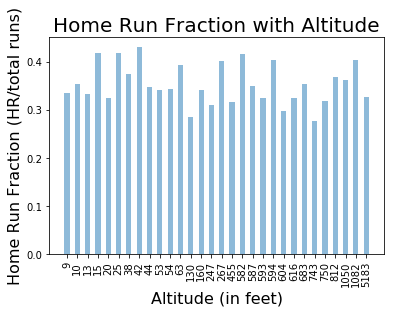

In [45]:
#graphing home run fraction vs altitude 
plt.title("Home Run Fraction with Altitude", size=20)
plt.xlabel("Altitude (in feet)", size=16)
plt.ylabel("Home Run Fraction (HR/total runs)", size=16)
y_pos = np.arange(len(HRF))
plt.bar(y_pos, HRF, align='center', alpha=0.5, width=0.5)
plt.xticks(y_pos, sorted(altitudes['altitude']), rotation='vertical')
plt.figure(figsize=(50, 3))
plt.show()

In [46]:
del team_ids[11]

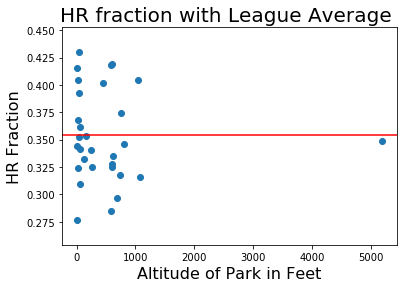

In [47]:
x = altitudes['altitude']
y = HRF
line = league_avg
#line = ax.plot(x,line)
fig, ax = plt.subplots()
plt.axhline(league_avg, color='r')
plt.xlabel("Altitude of Park in Feet", size = 16)
plt.ylabel("HR Fraction", size = 16)
plt.title("HR fraction with League Average ", size=20)
scatter = ax.scatter(x,y)
plt.show()

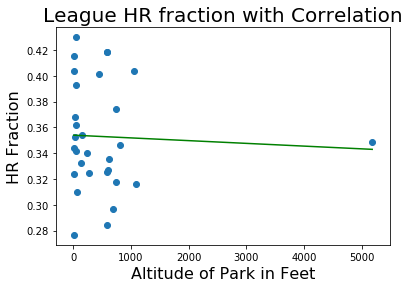

In [48]:
x = altitudes['altitude']
y = HRF
line = league_avg
#line = ax.plot(x,line)
fig, ax = plt.subplots()
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='green')
plt.xlabel("Altitude of Park in Feet", size = 16)
plt.ylabel("HR Fraction", size = 16)
plt.title("League HR fraction with Correlation", size=20)

scatter = ax.scatter(x,y)
plt.show()

In [57]:
d = {'Team': team_ids,'Home Run Fraction': HRF, 'altitude': altitudes['altitude']} 
dfCor = pd.DataFrame(data=d)
dfCor


,Home Run Fraction,Team,altitude
0,0.335125,ANA,616
1,0.353767,ARI,160
2,0.332621,ATL,130
3,0.418717,BAL,594
4,0.324051,BOS,20
5,0.418533,CHA,582
6,0.374416,CHN,750
7,0.429725,CIN,42
8,0.346416,CLE,812
9,0.340342,COL,247


In [50]:
dfCor['altitudes'].corr(dfCor['Home Run Fraction'])

-0.047993631762155577

In [66]:
altitudes = altitudes['altitude'].drop([18])
len(altitudes)

29

In [64]:
del HRF[10]

In [65]:
len(HRF)

29

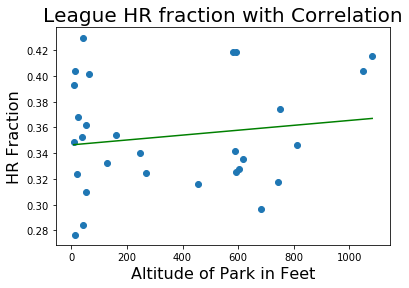

In [70]:
x = altitudes
y = HRF
line = league_avg
#line = ax.plot(x,line)
fig, ax = plt.subplots()
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='green')
plt.xlabel("Altitude of Park in Feet", size = 16)
plt.ylabel("HR Fraction", size = 16)
plt.title("League HR fraction with Correlation", size=20)

scatter = ax.scatter(x,y)
plt.show()

In [69]:
altitudes

0      616
1      160
2      130
3      594
4       20
5      582
6      750
7       42
8      812
9      247
10      10
11      44
12     587
13      54
14      63
15     455
16    1082
17       9
19     267
20      15
22     683
23     593
24      38
25      13
26     743
27      25
28      53
29    1050
30     604
Name: altitude, dtype: int64